<h1>Lab 1: Basic Digital Signal Processing</h1>

# Initialization



In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

Take a look at the data compiled by el Departament
de Salut of new infections by COVID-19 in Catalunya since March
1, 2020. I have extracted the total data (without segregation by sex
or age) in the file “newcases.txt” Observe that the daily data is very
noisy. In some graphic representations widely used they have opted to
reduce the noise by drawing a curve using points obtained by taking
a five day moving average of the data. That is they replace $x[n]$ by
$y[n] = (x[n − 2] + x[n − 1] + x[n] + x[n + 1] + x[n + 2])/5$ and draw a
curve passing through the new points y[n] to observe the trend.

* Express the new data $y[n]$ as a convolution against some impulse response function $h$, $y = x * h$.

Let's start by importing the data


In [2]:
df = pd.read_csv('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab1/newcases.txt', header=None)
df.head()

,0
0,2
1,5
2,9
3,7
4,18


In [3]:
x_original = df.values.T.ravel()
n_samples = len(x_original)

print("x:", x_original[:5])
print("number of samples in x:", n_samples)

x: [ 2  5  9  7 18]
number of samples in x: 409


<Figure size 640x480 with 0 Axes>

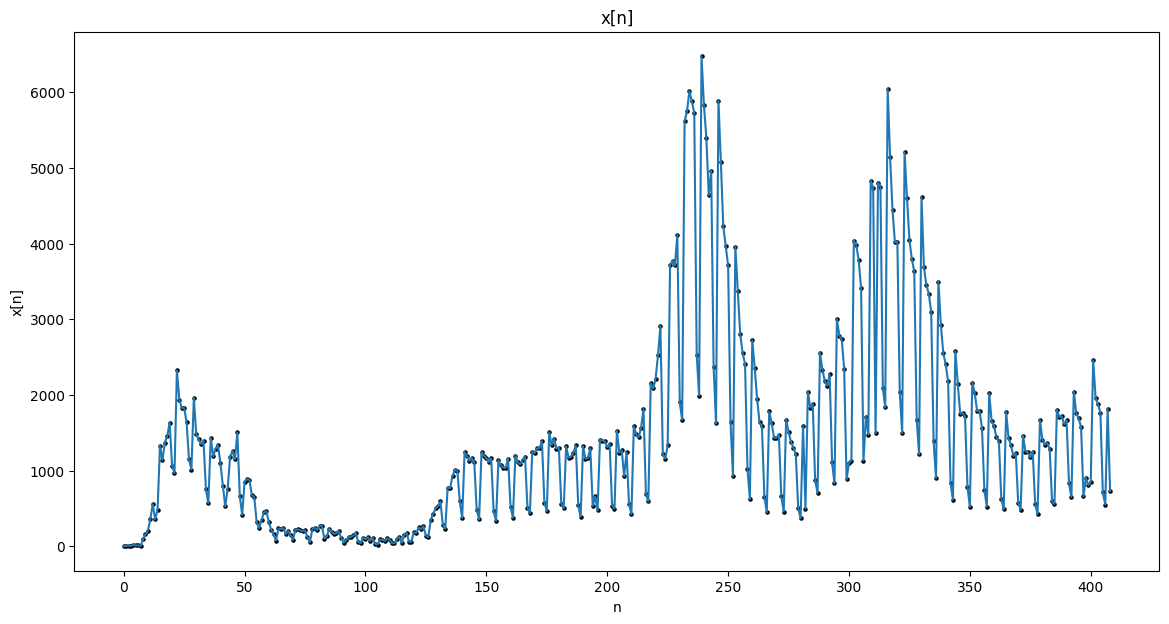

In [4]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x_original, s=5, color='black')
plt.plot(nn, x_original)

Now in order to apply the results we have seen in the theoretical part we should be able to consider $x$ as a sequence over all $\mathbb{Z}$. To do so, we can add a padding of zeros at the beginning and at the end of the discrete data we have. We will add a padding of length 2 for now, as it's the minimum we need to obtain $y[n]$ with the same length of $x[n]$, using a filter width of 5 days (2*padding+1)

<Figure size 640x480 with 0 Axes>

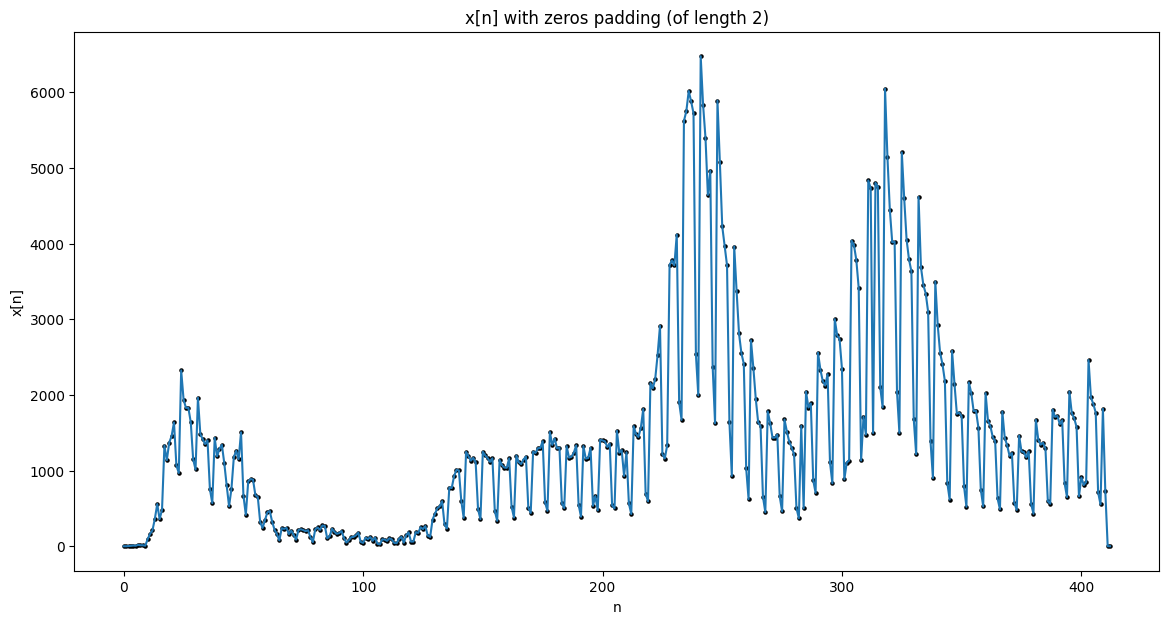

In [5]:
padding = 2
n_samples_padded = n_samples+padding*2
x = np.zeros(n_samples_padded) 

for n in range(n_samples):
  x[padding+n] = x_original[n]

nn = np.linspace(0, n_samples_padded-1, n_samples_padded).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n] with zeros padding (of length " + str(padding) + ")")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x, s=5, color='black')
plt.plot(nn, x)

However, this will affect the $y[n]$ by strongly deforming the data at the beginning and at the end of the signal. This can be avoided by adding padding equal to the first samples and the last samples respectively (also, depending on the type of signal, one could consider other forms of padding, that may preserve the local trend of the signal in a better way. However, in this case this is a good enough solution for our applications)

<Figure size 640x480 with 0 Axes>

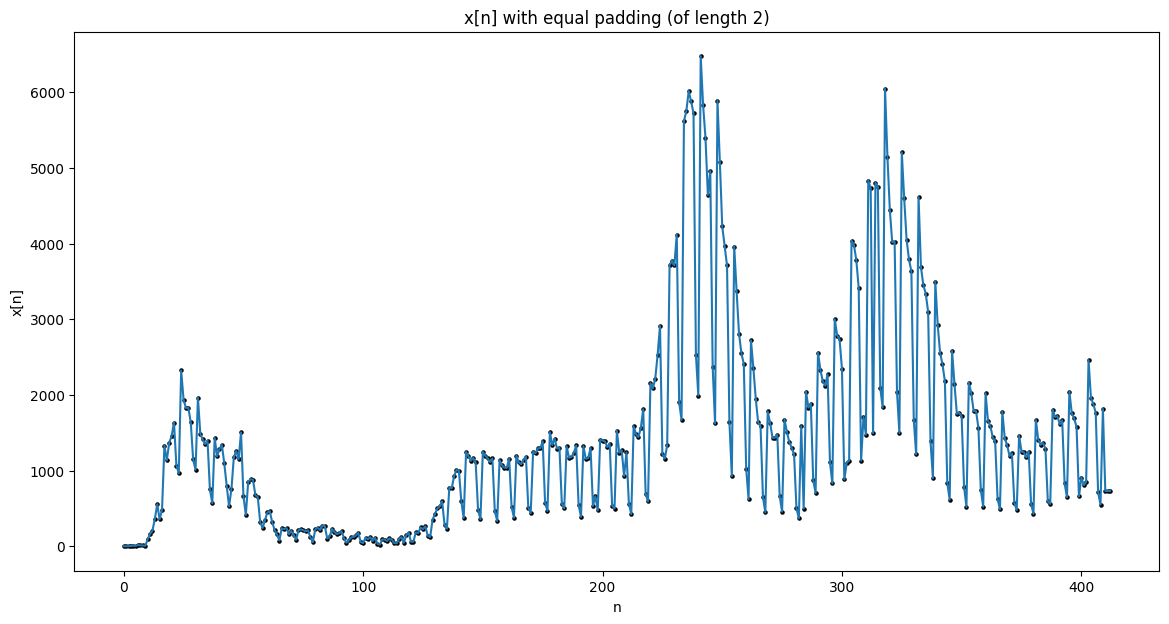

In [6]:
padding = 2
n_samples_padded = n_samples+padding*2
x = np.zeros(n_samples_padded) 

for n in range(n_samples):
  x[padding+n] = x_original[n]

for n in range(padding):
  x[n] = x_original[0]
  x[-(n+1)] = x_original[-1]

nn = np.linspace(0, n_samples_padded-1, n_samples_padded).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n] with equal padding (of length " + str(padding) + ")")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x, s=5, color='black')
plt.plot(nn, x)

Now we want to define the impulse function $h$ to obtain the new data $y[n] = (x[n − 2] + x[n − 1] + x[n] + x[n + 1] + x[n + 2])/5$ with the convolution $y = x * h$. 

$$y[n] = \frac{1}{5}\sum_{k\in Z, k\in [-2,2]}x[n-k] = \sum_{k\in Z}x[n-k]h[k]$$

So we have the impulse function $h$ that assumes value $\frac{1}{5}$ for $k=-2,-1,0,1,2$ and $0$ elsewhere. We thuse define the function $h$ as 

$$h = \frac{1}{5}\left[ \delta_{-2}[k] + \delta_{-1}[k] + \delta_{0}[k] + \delta_{1}[k] + \delta_{2}[k] \right]$$ 
$$h = \frac{1}{5}\left[ \tau_{-2} + \tau_{-1} + \tau_{0} + \tau_{1} + \tau_{2} \right]\delta[k]$$ 

Notice that since we are writing the code in Python, this approach making use of the function and the convolution is neither the most efficient nor is strictly necessary to obtain the desired filtering of the signal. However, we decided to strictly stick to the notation seen in the theoretical part, given that we are intersted in the application of the results we have seen and not in the optimization of the code.

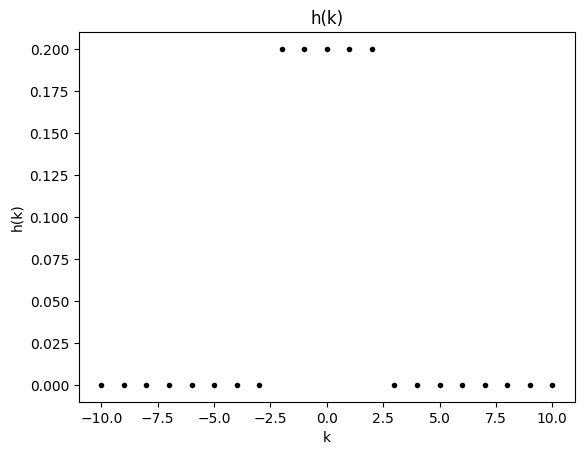

In [7]:
def h(k):
  if (k==-2 or k==-1 or k==0 or k==1 or k==2):
    return 1/5
  else:
    return 0

kk = np.linspace(-10, 10, 21)

plt.figure()
plt.title("h(k)")
plt.xlabel("k")
plt.ylabel("h(k)")
for k in kk:
  plt.plot(k, h(k), '.', color='black')

Note that for the sake of this exercise, only the values of $k=-2,-1,0,1,2$ give a non null result in the convolution. For this reason, since the computation needs to be descrete anyways, we limit the computation to those values, even though mathematically we would be convoluting over the whole interval. (We discretize right from the beginning to implement the convolution)

<Figure size 640x480 with 0 Axes>

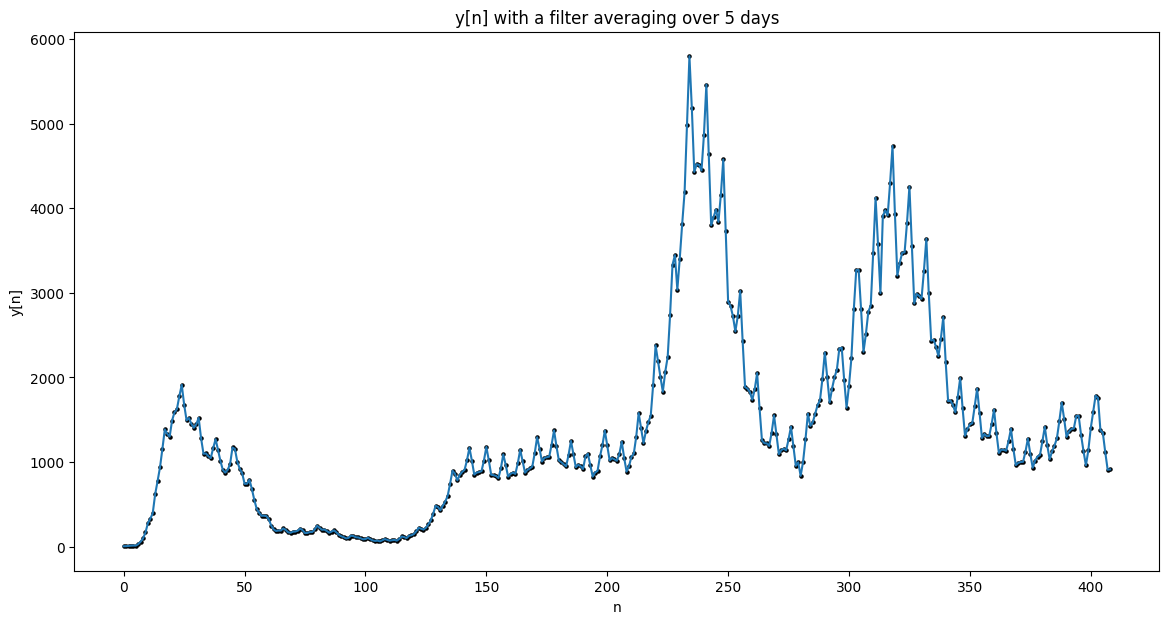

In [8]:
y = np.zeros(n_samples)     # Filtered signal
nn = np.linspace(0, n_samples-1, n_samples).astype(int)
kk = np.linspace(-padding, padding, padding*2+1).astype(int)

for n in nn:
  for k in kk:
    y[n] = y[n] + x[(n+padding)-k]*h(k)     # This is the implementation of the convolution

plt.figure()
plt.figure(figsize=(14,7))
plt.title("y[n] with a filter averaging over " + str(padding*2+1) + " days")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.scatter(nn, y, s=5, color='black')
plt.plot(nn, y)

* Compute and draw the absolute value of the Fourier transform
of the filter $h$.

Consider the filter $h$

$$h = \frac{1}{5}\left[ \delta_{-2}[k] + \delta_{-1}[k] + \delta_{0}[k] + \delta_{1}[k] + \delta_{2}[k] \right]$$ 

We have defined the Fourier transform of a discrete-time signal $x[k]$ defined as:
 

where $\omega$ is the angular frequency in radians/sample.

Applying this formula to the signal 

$$h[k] = \frac{1}{5}\left[ \delta_{-2}[k] + \delta_{-1}[k] + \delta_{0}[k] + \delta_{1}[k] + \delta_{2}[k] \right]$$

we have:

$$H(\omega) = \sum_{k=-\infty}^{\infty}h[k]e^{-j\omega k}$$

Substituting the definition of $h[k]$ we get:

$$H(\omega) = \frac{1}{5} \left( e^{-j2\omega} + e^{-j\omega} + 1 + e^{j\omega} + e^{j2\omega} \right)$$

which can be further simplified using Euler's formula as:

$$H(\omega) = \frac{1}{5}\left( 2cos(2\omega) + 2cos(\omega) + 1 \right)$$



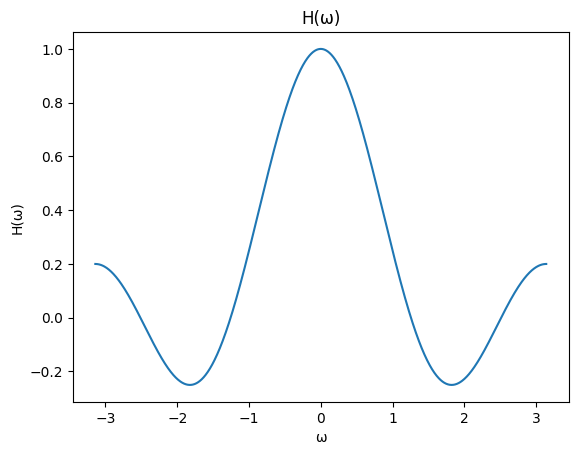

In [9]:
def H(omega):
  return 1/5*(2*np.cos(2*omega) + 2*np.cos(omega) + 1)

omega = np.linspace(-np.pi, np.pi, 1000)
H_omega = np.zeros(len(omega))
for i in range(len(omega)):
  H_omega[i] = H(omega[i])

plt.figure()
plt.title("H(ω)")
plt.xlabel("ω")
plt.ylabel("H(ω)")
plt.plot(omega, H_omega)

And the absolute value of the transform of the filter function, $|H(\omega)|$

$$|H(\omega)| = \left|\frac{1}{5}\left( 2cos(2\omega) + 2cos(\omega) + 1 \right)\right|$$

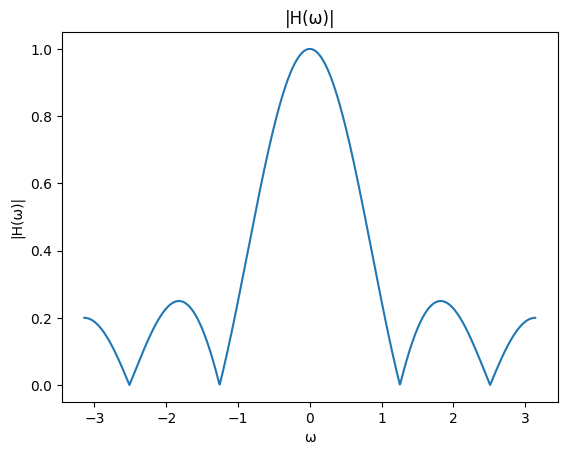

In [10]:
def H(omega):
  return 1/5*(2*np.cos(2*omega) + 2*np.cos(omega) + 1)

omega = np.linspace(-np.pi, np.pi, 1000)
H_omega_abs = np.zeros(len(omega))
for i in range(len(omega)):
  H_omega_abs[i] = abs(H(omega[i]))

plt.figure()
plt.title("|H(ω)|")
plt.xlabel("ω")
plt.ylabel("|H(ω)|")
plt.plot(omega, H_omega_abs)

* Try to explain why the noise is reduced. You can either plot the
Fourier transform of use the Octave/Matlab command freqz to
analyze it.

The noise is reduced becuase we are applying a low-pass filter, as it can be seen from the plot of the absolute value of $H(\omega)$, meaning that we are 'capturing' the low-frequency part of the signal. The noise in the data is a high-frequency component of the signal and so it is mitigated using this kind of filter. This because the new signal $y[n]$ is computed as $y=x*h$ and in terms of frequencies in the fourier transform space as $Y(\omega)=X(\omega)H(\omega)$ and so for high values of $|H(\omega)|$ the signal is 'captured', meaning is preserved, while for low values of $|H(\omega)|$ the value of $X(\omega)$ is mitigated

* Propose alternative filters $h$.

A possible anlternative filter would be a filters that avarages the data weekly, since the data source often lacks reliable data over ranges of few days (such as the weekends or festivities). We can apply such a filter using the impulse function $h$

$$h = \frac{1}{7}\left[ \delta_{-3}[k] + \delta_{-2}[k] + \delta_{-1}[k] + \delta_{0}[k] + \delta_{1}[k] + \delta_{2}[k] + \delta_{3}[k] \right]$$ 
$$h = \frac{1}{7}\left[ \tau_{-3} + \tau_{-2} + \tau_{-1} + \tau_{0} + \tau_{1} + \tau_{2} + \tau_{3} \right]\delta[k]$$ 

<Figure size 640x480 with 0 Axes>

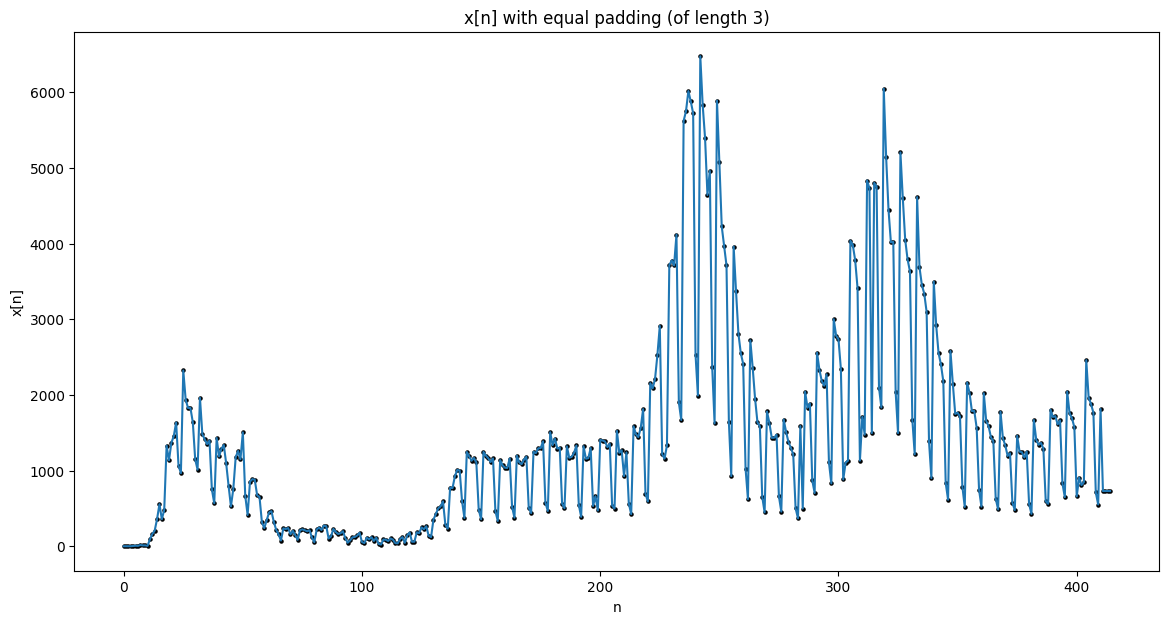

In [15]:
padding = 3
n_samples_padded = n_samples+padding*2
x = np.zeros(n_samples_padded) 

for n in range(n_samples):
  x[padding+n] = x_original[n]

for n in range(padding):
  x[n] = x_original[0]
  x[-(n+1)] = x_original[-1]

nn = np.linspace(0, n_samples_padded-1, n_samples_padded).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n] with equal padding (of length " + str(padding) + ")")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x, s=5, color='black')
plt.plot(nn, x)

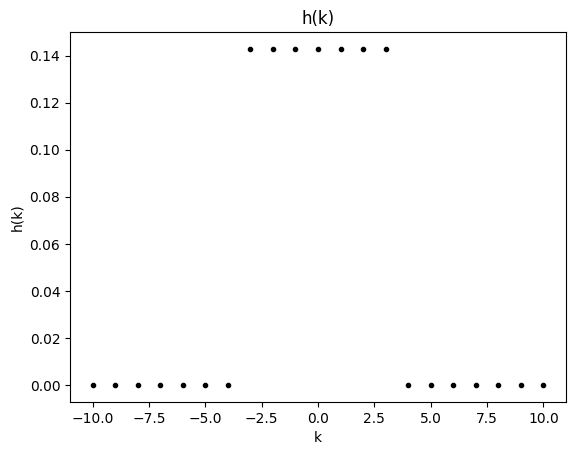

In [16]:
def h(k):
  if (k==-3 or k==-2 or k==-1 or k==0 or k==1 or k==2 or k==3):
    return 1/7
  else:
    return 0
  
kk = np.linspace(-10, 10, 21)

plt.figure()
plt.title("h(k)")
plt.xlabel("k")
plt.ylabel("h(k)")
for k in kk:
  plt.plot(k, h(k), '.', color='black')

<Figure size 640x480 with 0 Axes>

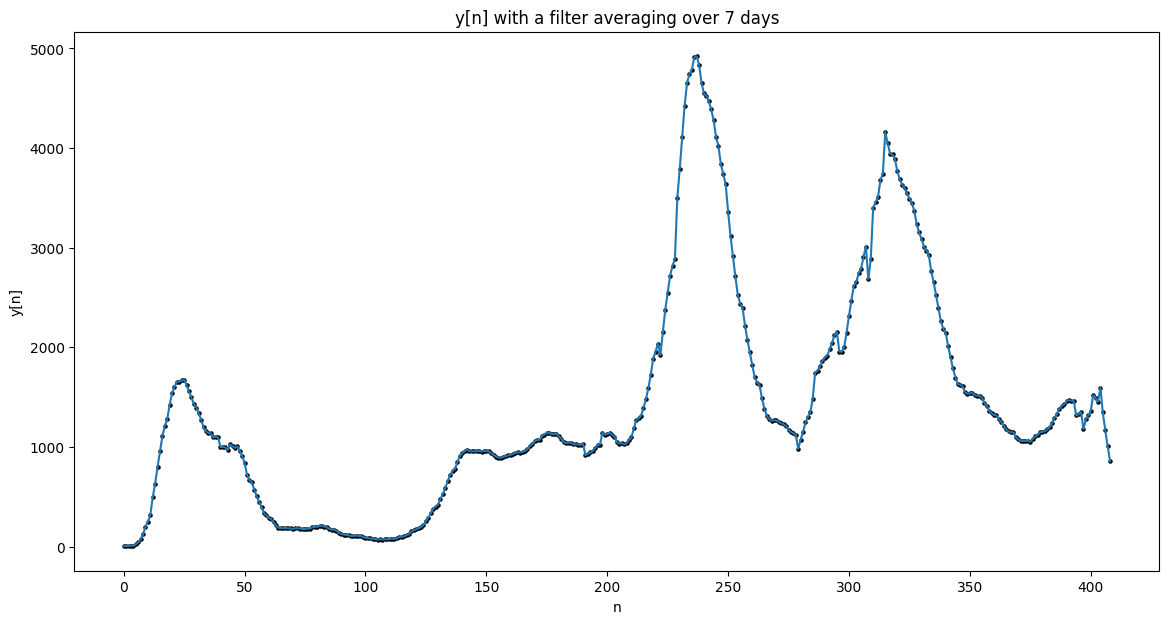

In [17]:
y = np.zeros(n_samples)
nn = np.linspace(0, n_samples-1, n_samples).astype(int)
kk = np.linspace(-padding, padding, padding*2+1).astype(int)

for n in nn:
  for k in kk:
    y[n] = y[n] + x[n-k+padding]*h(k)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("y[n] with a filter averaging over " + str(padding*2+1) + " days")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.scatter(nn, y, s=5, color='black')
plt.plot(nn, y)

As we can see, the resulting filtered signal is much smoother.

In this case, the transform of the impulse function results as

$$H(\omega) = \sum_{k=-\infty}^{\infty}h[k]e^{-j\omega k}$$

$$H(\omega) = \frac{1}{7} \left( e^{-j3\omega} +  e^{-j2\omega} + e^{-j\omega} + 1 + e^{j\omega} + e^{j2\omega} + e^{j3\omega} \right)$$

which can be further simplified using Euler's formula as:

$$H(\omega) = \frac{1}{7}\left( 2cos(3\omega) + 2cos(2\omega) + 2cos(\omega) + 1 \right)$$

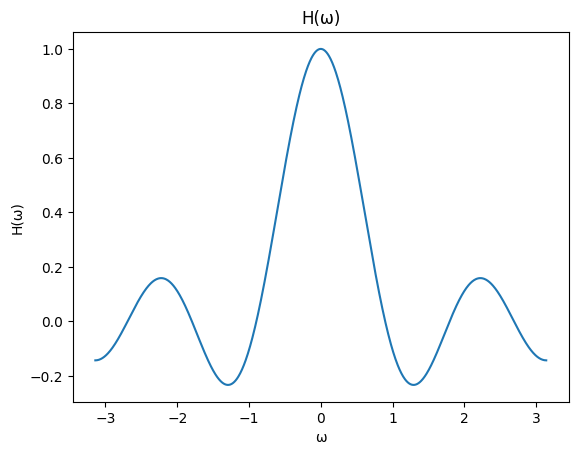

In [23]:
def H(omega):
  return 1/7*(2*np.cos(3*omega) + 2*np.cos(2*omega) + 2*np.cos(omega) + 1)

omega = np.linspace(-np.pi, np.pi, 1000)
H_omega = np.zeros(len(omega))
for i in range(len(omega)):
  H_omega[i] = H(omega[i])

plt.figure()
plt.title("H(ω)")
plt.xlabel("ω")
plt.ylabel("H(ω)")
plt.plot(omega, H_omega)

And the absolute value of the transform of the filter function, $|H(\omega)|$

$$|H(\omega)| = \left|\frac{1}{7}\left( 2cos(3\omega) + 2cos(2\omega) + 2cos(\omega) + 1 \right)\right|$$

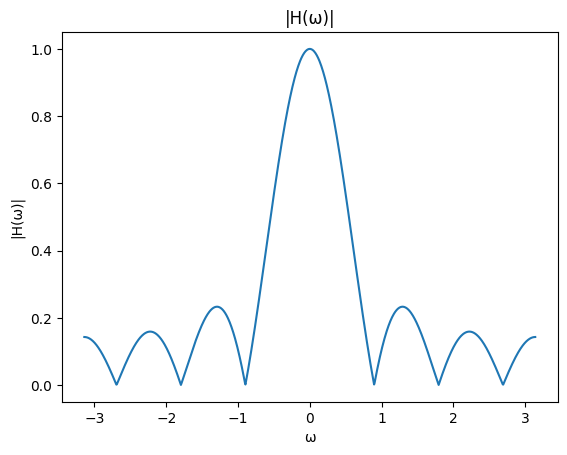

In [25]:
def H(omega):
  return 1/7*(2*np.cos(3*omega) + 2*np.cos(2*omega) + 2*np.cos(omega) + 1)

omega = np.linspace(-np.pi, np.pi, 1000)
H_omega_abs = np.zeros(len(omega))
for i in range(len(omega)):
  H_omega_abs[i] = abs(H(omega[i]))

plt.figure()
plt.title("|H(ω)|")
plt.xlabel("ω")
plt.ylabel("|H(ω)|")
plt.plot(omega, H_omega_abs)

The transform of the impulse function shows how this filter is able to capture better the low frequencies compared to the previous one.

# Exercise 2

Eliminate the noise from a GPS, signal. Take the
heights obtained from a GPS from one of the stages of the circuit “Carros de Foc”. Concretely from the stage from Refugi Ventura Calvell to
Estany Llong. You can get the original file here. I have parsed the
heights and they are in the file heights.txt.

* Compute the total height climbed and descended, that is compute $$Climbing = \sum_{n:x[n+1]>x[n]}x[n+1]-x[n]$$ and $$Descending = \sum_{n:x[n+1]<x[n]}x[n]-x[n+1]$$ where $x[n]$ is a vector that contains the heights that you should
have read previously.

Let's start by importing the data

In [14]:
df = pd.read_csv('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab1/heights.txt', header=None)
df.head()

,0
0,2212.70
1,2212.58
2,2212.60
3,2212.48
4,2212.41


In [15]:
x_original = df.values.T.ravel()
n_samples = len(x_original)

print("x:", x_original[:5])
print("number of samples in x:", n_samples)

x: [2212.7  2212.58 2212.6  2212.48 2212.41]
number of samples in x: 2157


<Figure size 640x480 with 0 Axes>

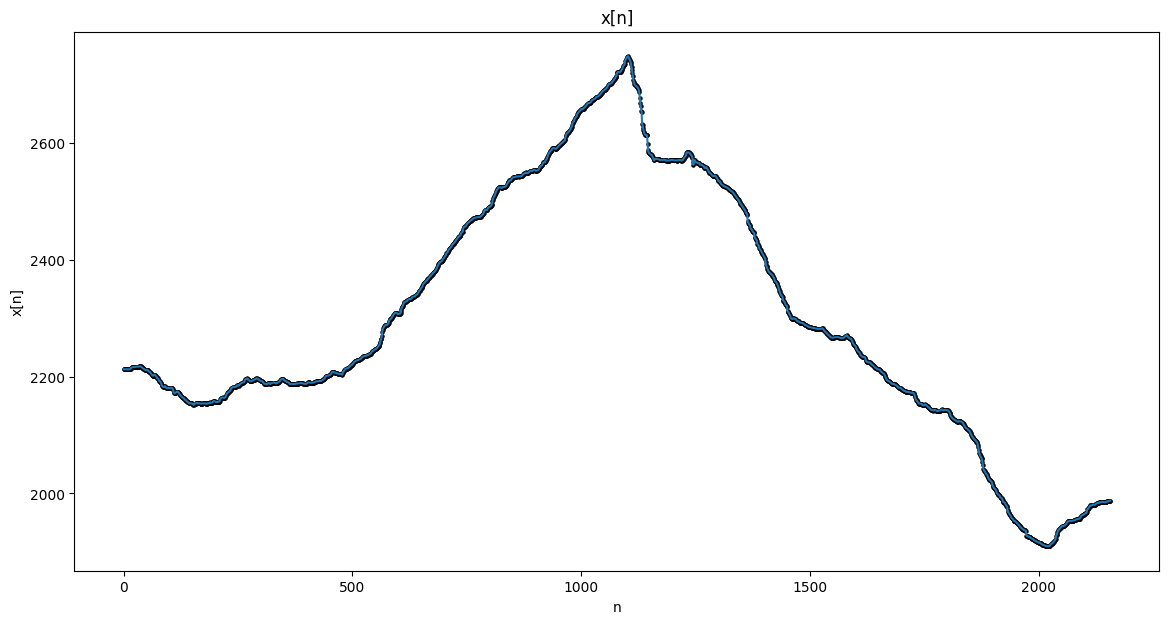

In [16]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x_original, s=5, color='black')
plt.plot(nn, x_original)

We can now compute the Climbing and Descending quantities defined before

In [17]:
Climbing_unfiltered = 0
Descending_unfiltered = 0

for n in range(n_samples-1):
  if x_original[n+1]>x_original[n]:
    Climbing_unfiltered = Climbing_unfiltered+x_original[n+1]-x_original[n]
  if x_original[n+1]<x_original[n]:
    Descending_unfiltered = Descending_unfiltered+x_original[n]-x_original[n+1]

print("Climbing unfiltered:", Climbing_unfiltered)
print("Descending unfiltered:", Descending_unfiltered)

Climbing unfiltered: 796.180000000001
Descending unfiltered: 1021.0100000000002


* Apply a low pass filter, i.e. remove part of the noise produced
by errors in the GPS measurement. For this you can try to find
the coefficients $h[n]$ of a low pass filter such that its Fourier
transform mimics a characteristic function. Alternatively you
can use a filter as in the previous exercise.

As a first approah we'll use a similar a filter as in the previous exercise. Since the data does not look like it contains too much noise, we'll use a filter that averages over a small window, let's say 3

<Figure size 640x480 with 0 Axes>

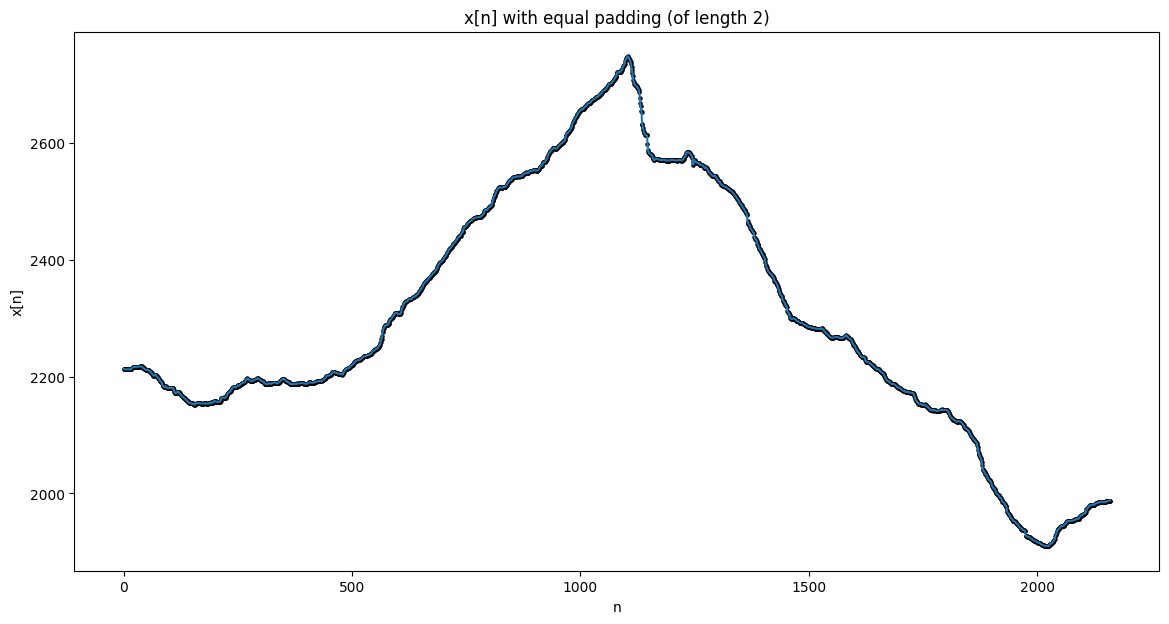

In [18]:
padding = 2
n_samples_padded = n_samples+padding*2
x = np.zeros(n_samples_padded) 

for n in range(n_samples):
  x[padding+n] = x_original[n]

for n in range(padding):
  x[n] = x_original[0]
  x[-(n+1)] = x_original[-1]

nn = np.linspace(0, n_samples_padded-1, n_samples_padded).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n] with equal padding (of length " + str(padding) + ")")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.scatter(nn, x, s=5, color='black')
plt.plot(nn, x)

The impulse function we'll use to obtain such a filter is the following 

$$h = \frac{1}{3}\left[ \delta_{-1}[k] + \delta_{0}[k] + \delta_{1}[k] \right]$$ 
$$h = \frac{1}{3}\left[ \tau_{-1} + \tau_{0} + \tau_{1} \right]\delta[k]$$ 

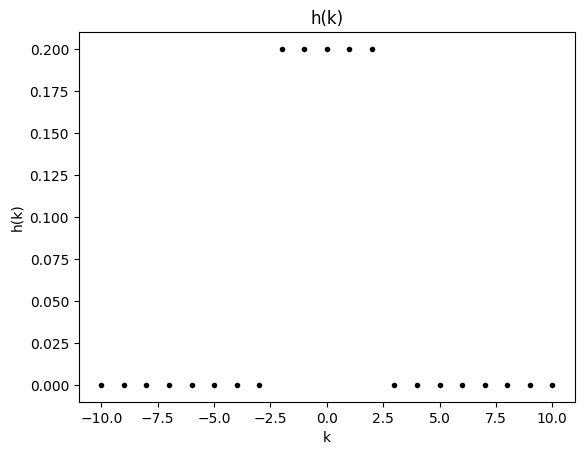

In [19]:
def h(k):
  if (k==-2 or k==-1 or k==0 or k==1 or k==2):
    return 1/5
  else:
    return 0

kk = np.linspace(-10, 10, 21)

plt.figure()
plt.title("h(k)")
plt.xlabel("k")
plt.ylabel("h(k)")
for k in kk:
  plt.plot(k, h(k), '.', color='black')

<Figure size 640x480 with 0 Axes>

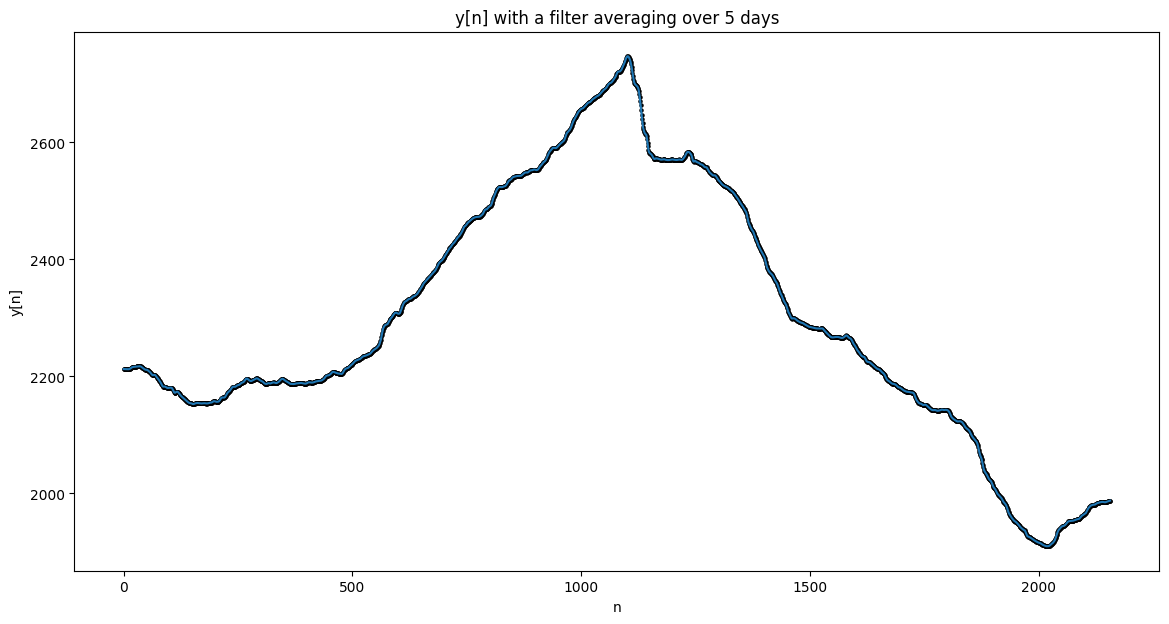

In [20]:
y = np.zeros(n_samples)
nn = np.linspace(0, n_samples-1, n_samples).astype(int)
kk = np.linspace(-padding, padding, padding*2+1).astype(int)

for n in nn:
  for k in kk:
    y[n] = y[n] + x[(n+padding)-k]*h(k)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("y[n] with a filter averaging over " + str(padding*2+1) + " days")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.scatter(nn, y, s=5, color='black')
plt.plot(nn, y)

* Recompute Climbing and Descending once we have applied a low pass filter.

In [21]:
Climbing_filtered = 0
Descending_filtered = 0

for n in range(n_samples-1):
  if y[n+1]>y[n]:
    Climbing_filtered = Climbing_filtered+y[n+1]-y[n]
  if y[n+1]<y[n]:
    Descending_filtered = Descending_filtered+y[n]-y[n+1]

print("Climbing filtered:", Climbing_filtered)
print("Descending filtered:", Descending_filtered)

Climbing filtered: 747.5919999999971
Descending filtered: 972.5919999999996


* Explain the difference.

In [22]:
print("Climbing filtered:", Climbing_filtered)
print("Descending filtered:", Descending_filtered)
print("Climbing unfiltered:", Climbing_unfiltered)
print("Descending unfiltered:", Descending_unfiltered)

Climbing filtered: 747.5919999999971
Descending filtered: 972.5919999999996
Climbing unfiltered: 796.180000000001
Descending unfiltered: 1021.0100000000002
